<a href="https://colab.research.google.com/github/KorhanErkan/TASK7-ABCDEF/blob/master/TASK_7_ABCDEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK-7A: Please apply one-hot encoding method on one of the categorical variables (not SEX/gender) for the given AD dataset. Please explain what kind of transformation occured on the dataset. 


--------------------------------------------------------------------------------



TASK-7B: Please provide a couple of pivot tables in order to illustrate how SEX variable is influential on our target array (CDRGLOB). Please provide a few multidimensional analyses (not limited to two variables).




--------------------------------------------------------------------------------

TASK-7C: Referring to the problem in part B, please provide a potential solution to the gender-based issue that appears as a bottleneck for the model development phase. One possible solution might be to provide normalization of the numeric columns with respect to the total brain volume (NACCBRNV column).


--------------------------------------------------------------------------------



TASK-7D: After the normalization process, please provide a correlation matrix to report the critical features that have high correlation (positive or negative) with the target array (CDRGLOB).



--------------------------------------------------------------------------------



TASK-7E: Please develop 3 distinct formulas (in other words derived features like BMI score) that involve the critical features in Part-7D and then ensure that these derived features could be used as predictive variables for CDRGLOB (again correlation analysis will give you insight).



--------------------------------------------------------------------------------

TASK-7F: Then please develop a machine learning model with the 3 derived features that you obtain in 7E via the use of train-test split (be careful about stratify parameter in this function) and gridsearchCV function as well as a classification algorithm (such as Gaussian Naive Bayes) but please do not forget to optimize its hyperparameters. Finally, please report your findings via the use of classification report function (also a sklearn function). 

--------------------------------------------------------------------------------
TASK-7A: Please apply one-hot encoding method on one of the categorical variables (not SEX/gender) for the given AD dataset. Please explain what kind of transformation occured on the dataset.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer

In [4]:
data = pd.read_excel("123.xlsx")


In [5]:
one_hot_encoded_data = pd.get_dummies(data, columns = ["HXHYPER"])
print(one_hot_encoded_data)

      SEX  EDUC  MARISTAT  INDEPEND  RESIDENC  NACCFAM  ANYMEDS  SMOKYRS  \
0       2    18         1         1         1        1        1        0   
1       1    11         1         1         1        1        1        0   
2       2    16         1         1         1        1        1       10   
3       1    14         1         1         1        0        1        0   
4       1    16         1         1         2        0        1       50   
...   ...   ...       ...       ...       ...      ...      ...      ...   
1349    1    20         1         1         1        1        1        0   
1350    1    16         1         2         1        0        1        0   
1351    2    14         2         1         1        1        1        0   
1352    2    20         3         1         1        1        1       25   
1353    2    14         1         1         1        1        1       10   

      NACCTBI  DIABETES  ...  RSUPPAR  RSUPPARM  RSUPTEM  RSUPTEMM  RSUPMAR  \
0       

TASK-7B: Please provide a couple of pivot tables in order to illustrate how SEX variable is influential on our target array (CDRGLOB). Please provide a few multidimensional analyses (not limited to two variables).

In [6]:
data.pivot_table('CDRGLOB', index='SEX', columns='EDUC')

EDUC,0,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
SEX,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.000000,1.0,2.0,1.5,1.0,2.25,1.461538,0.666667,0.800000,...,0.78400,1.000000,0.772358,0.791667,0.905882,1.0,1.0,1.5,0.0,NaN
2,1.0,1.333333,1.5,2.0,1.0,0.5,0.60,1.076923,0.666667,1.285714,...,0.51087,0.466667,0.464789,0.125000,0.480000,1.0,0.0,NaN,NaN,0.0


EDUC degerinin artmasiyla CDRGLOB degiskenin her iki cinsiyet icinde azaldigini soyleyebiliriz. Ancak 2 Numarali cinsiyette azalis daha belirgindir.

In [7]:
data.pivot_table('CDRGLOB', index='SEX', columns='INDEPEND')

INDEPEND,1,2,3,4
SEX,,,,
1,0.521303,1.503597,2.294118,3.0
2,0.328990,1.362903,2.171429,2.5


CDRGLOB degeriyle INDEPEND degeri dogru orantilidir. Cinsiyet olarak yorumlamamiz gerekirse 2 Numarali cinsiyetin INDEPEND degerleri daha dusuktur. Ancak genel olarak bu tabloda Tavuk-Yumurta iliskisi olduğu soylenebilir. CDRGLOB degeri yüksek olan bir hastanin INDEPEND olmasi zaten beklenmektedir cinsiyetin büyük bir etkisi oldugunu dusunmuyorum.

In [8]:
data.pivot_table('CDRGLOB', index='SEX', columns='NACCBRNV')

NACCBRNV,697.029,709.073,737.519,744.778,751.830,758.270,759.296,759.470,763.983,766.932,...,1291.308,1306.606,1332.910,1343.681,1352.018,1361.110,1361.561,1364.305,1367.365,1401.835
SEX,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


TASK-7C: Referring to the problem in part B, please provide a potential solution to the gender-based issue that appears as a bottleneck for the model development phase. One possible solution might be to provide normalization of the numeric columns with respect to the total brain volume (NACCBRNV column).

In [9]:
from sklearn import preprocessing 
data[["NACCBRNV"]] = preprocessing.minmax_scale(data[["NACCBRNV"]])


In [10]:
 x = data.iloc[:,:].div(data.NACCBRNV,axis=0)
 x

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,3.341105,30.069941,1.670552,1.670552,1.670552,1.670552,1.670552,0.000000,0.0,0.000000,...,46.614756,3.701443,17.287042,2.842278,22.427164,2.909935,16.488351,2.805191,1.487794,1.995809
1,1.716314,18.879452,1.716314,1.716314,1.716314,1.716314,1.716314,0.000000,0.0,0.000000,...,49.876081,4.616884,15.875903,2.797592,25.538750,3.947522,12.477602,3.243833,2.368513,3.484117
2,2.872474,22.979791,1.436237,1.436237,1.436237,1.436237,1.436237,14.362370,0.0,1.436237,...,47.395820,3.648042,19.662084,2.240530,23.310126,2.973011,14.520356,2.642676,1.450599,2.154355
3,1.684925,23.588956,1.684925,1.684925,1.684925,0.000000,1.684925,0.000000,0.0,1.684925,...,53.378438,4.060670,16.242681,2.443142,25.459224,2.763278,17.506375,3.083414,1.246845,1.853418
4,2.218366,35.493859,2.218366,2.218366,4.436732,0.000000,2.218366,110.918310,0.0,0.000000,...,62.254233,4.326036,20.214862,2.313090,29.673532,3.609282,16.824977,3.237705,1.472551,1.891601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1.587136,31.742728,1.587136,1.587136,1.587136,1.587136,1.587136,0.000000,0.0,0.000000,...,39.185127,4.210355,16.737940,3.445991,22.398938,4.576190,14.788302,3.742785,1.068936,1.629989
1350,1.423014,22.768223,1.423014,2.846028,1.423014,0.000000,1.423014,0.000000,0.0,0.000000,...,35.277654,2.987333,14.812721,2.113887,15.351474,2.707569,14.519580,2.914902,1.034104,1.130727
1351,3.798050,26.586349,3.798050,1.899025,1.899025,1.899025,1.899025,0.000000,0.0,0.000000,...,45.291744,4.025933,23.528918,2.905508,24.041655,3.779060,18.002756,3.304303,2.240849,3.019450
1352,3.448246,34.482462,5.172369,1.724123,1.724123,1.724123,1.724123,43.103077,0.0,0.000000,...,54.051259,4.189619,18.655012,2.931009,23.741175,3.620658,19.172249,3.689623,2.258601,2.620667


TASK-7D: After the normalization process, please provide a correlation matrix to report the critical features that have high correlation (positive or negative) with the target array (CDRGLOB).


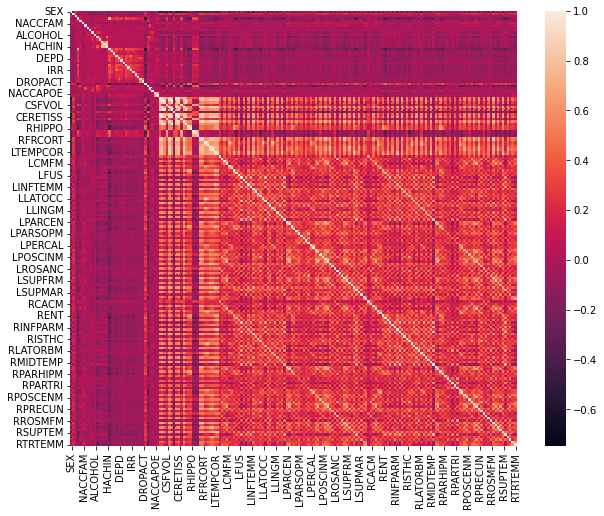

In [11]:
plt.subplots(figsize = (10,8))
sns.heatmap(data.corr())

In [12]:
data.corr()[(data.corr()>0.50) | (data.corr()<-0.45)][16:17].dropna(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


,INDEPEND,CDRGLOB,NACCMMSE,LENTM,RENTM
CDRGLOB,0.693881,1.0,-0.74666,-0.453646,-0.478207


TASK-7E: Please develop 3 distinct formulas (in other words derived features like BMI score) that involve the critical features in Part-7D and then ensure that these derived features could be used as predictive variables for CDRGLOB (again correlation analysis will give you insight).

In [13]:
Formula1 = (data["INDEPEND"]/data["NACCMMSE"])
Formula2 = (data["INDEPEND"])/(data["NACCMMSE"]+data["LENTM"]+data["RENTM"])
Formula3 = ((10-(data["NACCMMSE"]+data["LENTM"]+data["RENTM"]))*data["INDEPEND"])
CDR = data["CDRGLOB"]

data2 = pd.concat([Formula1, Formula2, Formula3, CDR], axis=1, join ="inner")
data2.columns =['Formula1', 'Formula2', 'Formula3', 'CDRGLOB']

data2.corr().iloc[-1:,:-1]

,Formula1,Formula2,Formula3
CDRGLOB,0.692764,0.725233,-0.192589


TASK-7F: Then please develop a machine learning model with the 3 derived features that you obtain in 7E via the use of train-test split (be careful about stratify parameter in this function) and gridsearchCV function as well as a classification algorithm (such as Gaussian Naive Bayes) but please do not forget to optimize its hyperparameters. Finally, please report your findings via the use of classification report function (also a sklearn function).

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [15]:
model = KNeighborsClassifier()
data3 = pd.concat([Formula1, Formula2, Formula3], axis=1, join ="inner")
X1, X2, y1, y2 = train_test_split(data3, CDR, random_state=0,     
                                  train_size=0.8)

model.fit(X1,y1)                                                                
y_pred = model.predict(X2)

In [16]:
param_grid = {"n_neighbors" : [6,7,8,9,10,11,12,13],
              "weights": ["uniform", "distance"],
              "algorithm": ["auto", "ball_tree","kd_tree", "brute"]}

grid = GridSearchCV(model, param_grid, cv=5)
grid_search = grid.fit(X1, y1)
print(grid.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

print(classification_report(y2, y_pred))

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}
Accuracy for our training dataset with tuning is : 66.20%
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       128
           1       0.59      0.52      0.55       102
           2       0.31      0.16      0.21        32
           3       0.25      0.11      0.15         9

    accuracy                           0.65       271
   macro avg       0.47      0.42      0.43       271
weighted avg       0.61      0.65      0.62       271

